<div class="alert alert-block" style="color: green">
    <h1><center> DAKD 2024 EXERCISE 2: SUPERVISED LEARNING  </center></h1>

### Fill in your name, student id number and email address
#### name: Muhammad Junaid Raza
#### student id: 2409917 
#### email: mjraza@utu.fi

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about the data, so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is <font color = green>modeling</font>.

The questions to be answered at this stage could include:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should never forget it in your future data analyses</i>.

-----

#### General Guidance for Exercises

- <b>Complete all tasks:</b> Make sure to answer all questions, even if you cannot get your script to fully work.
- <b>Code clarity:</b> Write clear and readable code. Include comments to explain what your code does.
- <b>Effective visualizations:</b> Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- <b>Notebook organization:</b> You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- <b>Submission:</b> Submit both the .ipynb and .html or .pdf versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.
- <b>Grading criteria:</b>
    - The grading scale is *Fail*/*Pass*/*Pass with honors* (+1).
    - To pass, you must complete the required parts 1-4.
    - To achieve Pass with honors, complete the bonus exercises.
- <b>Technical issues:</b>
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    - Cite all external sources used, whether for code or explanations.
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at tuhlei@utu.fi, aibekt@utu.fi.
- <b>Use of AI and large language models:</b>
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.
- <b>Time management:</b> Do not leave your work until the last moment. No feedback will be available during weekends.
- <b>Additional notes:</b>
    - You can find the specific deadlines and session times for each assignment on the Moodle course page.
    - Ensure all your answers are concise—typically a few sentences per question.
    - Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
 are run in sequence.


<font color = green> The guided exercise session is held on the 27th of November at 14:15-16:00, at lecture hall X, Natura building.</font>

<font color = red size = 4>The deadline is the 2nd of December at 23:59</font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### <font color = red> Packages needed for this exercise: </font>

You can use other packages as well, but this excercise can be completed with those below.

In [94]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc


# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is a classic supervised machine learning technique based on the assumption that data points with similar features tend to belong to the same class, and thus are likely to be near each other in feature space.

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`. Let's have a brief look at the features again:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in years 
| sex | binary | Female == 0, Male == 1
| height | numeric | Measured weight of the patient (kg)
| weight | numeric | Measured weight of the patient (cm)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| alco | binary | A subjective feature based on asking the patient whether or not he/she consumes alcohol
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| gluc | categorical | Glucose associated risk information evaluated by a doctor

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1000 rows from the dataframe using a fixed random seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: As mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's a new variable, `gluc` (about glucose aka blood sugar levels), which is also one-hot-encoded for you. It has similar values as `cholesterol`.*


In [21]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [23]:
### Code - Resample and print 15 rows
sampled_cardio_data = cardio_data.sample(n=1000, random_state=42)
sampled_cardio_data.head(15)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_at_risk,cholesterol_elevated,gluc_normal,gluc_at_risk,gluc_elevated
1782,60,0,156,51.0,120,80,0,0,1,0,1,0,0,1,0,0
3917,46,0,160,59.0,145,1000,0,0,1,0,1,0,0,1,0,0
221,61,1,171,63.0,120,80,1,0,1,0,1,0,0,1,0,0
2135,54,0,155,60.0,120,80,0,0,1,0,1,0,0,1,0,0
5224,63,0,158,60.0,120,80,0,0,1,1,1,0,0,1,0,0
1168,43,0,164,97.0,100,70,0,0,1,0,1,0,0,1,0,0
879,63,1,173,71.0,140,80,0,0,1,0,1,0,0,1,0,0
156,63,1,170,71.0,120,80,0,0,1,0,1,0,0,1,0,0
1657,51,0,170,90.0,150,90,0,0,1,0,0,0,1,0,1,0
323,57,1,176,76.0,140,80,0,0,1,0,1,0,0,1,0,0


----

We have the data so now, let's put it to use. All the analyses will be done based on this sample of 1000.

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

Before the exercise itself, we might as well discuss about the reproducibility of experiments we conduct in research. It can be quite a nightmare for some if code spewed out only random results. To address this, we can set a **random seed** to ensure that any random processes, such as splitting our dataset into training and test sets, yield consistent results across multiple runs. By using a fixed random seed, we enhance the reproducibility of our experiments, making it easier to validate findings. In fact, we already used one when sampling our subset from the loaded dataset.

**Exercise 1 B)**

Gather the features into one array and the target variable into another array. Create training and test data by splitting the data into training (80%) and test (20%) sets. Use a fixed random seed to ensure that even if you execute this cell hundreds of times, you will get the same split each time.

- Do you need stratification for our dataset? Explain your decision.

In [25]:
### Code - Train-test split

#Cardio value counts
print(sampled_cardio_data['cardio'].value_counts(normalize=True))

#Gathering features and target variable in separate arrays
X = sampled_cardio_data.drop(columns=['cardio'])  
y = sampled_cardio_data['cardio']  

#Applying train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes of the resulting sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

cardio
0    0.708
1    0.292
Name: proportion, dtype: float64
Training set: (800, 15), (800,)
Test set: (200, 15), (200,)


<font color = lightcoral>Yes we need stratification for our dataset. To justify my decision I have added a code line through I am calculating the value proportion for each class of cardio. According to the results we can see that the class distribution is uneven that is more than 70% results belong to the class '0' representing false and the remaining proportion belongs to the class '1' means true. Due to this, stratification is needed in order to prevent model to make baised decision.</font>

----------

**Exercise 1 C)** 

Standardize the numerical features in both the train and test sets.

- Explain how the k-NN model makes predictions about whether or not a patient has cardiovascular disease (CVD) when the features are not standardized. Specifically, discuss how the varying scales of different features can influence the model's predictions, and how standardization would change this influence.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [27]:
### Code - Standardization
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

<font color = lightcoral> When the features aren't standardized, features with larger numerical ranges will influence the distance calculation e.g. let's suppose that age is ranging from 20 to 100 and weight is ranging from 50 to 100, age will have a disproportionately larger influence, even if it's less relevant to the target variable i.e. cardio. By implmetation of standardization all features will have an equal influence to the distance calculation.</font>

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

*Note: We are very aware that there are functions available for these metrics, but this time, please calculate them using the confusion matrix.*

In [31]:
### Code - the kNN classifier

#Source: 
### https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

# model intialisation
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

con_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", con_matrix)

#Source: 
### https://plainenglish.io/blog/understanding-confusion-matrix-and-applying-it-on-knn-classifier-on-iris-dataset-b57f85d05cd8
# Format of Confusion matrix: 
# [ [TN, FP],
#   [FN, TP] ]

## Now we will measure accuracy, precision and recall
## Source: 
### https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd
TN, FP, FN, TP = con_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.2f}")

precision = TP / (TP + FP)
print(f"Precision: {precision:.2f}")

recall = TP / (TP + FN)
print(f"Recall: {recall:.2f}")


Confusion Matrix:
 [[121  21]
 [ 35  23]]
Accuracy: 0.72
Precision: 0.52
Recall: 0.40


<font color = lightcoral>1. TN represents the True Negatives meaning that the number of patients who are predicted to have no cardiovascular disease and indeed have no CVD. FP represents the False Positives meaning that the number of patients predicted to have CVD but actually do not have CVD. FN represents False Negatives meaning that the number of patients predicted not to have CVD but actually have CVD. TP represents True Positives meaning that the number of patients predicted to have CVD who indeed have CVD. <br>
2. <font color = 'blue'>Accuracy</font> shows the overall correctness of the model, but it may be misleading when the classes are imbalanced. For example, if most patients do not have CVD, the model might predict "no CVD" for most cases and still achieve high accuracy. <font color = 'blue'>Precision</font> represents the reliability and correctness of the results computed by the model. High precision means that when the model predicts CVD, it’s more likely to be correct. <font color = 'blue'>Recall</font> shows how sensitive the model is to actual cases of CVD. A higher recall means the model is better at identifying patients who actually have CVD, even if it results in some false positives.  <br>
3. There are many more patients without CVD than with CVD and because of that the model may predict "no CVD" more frequently. This can result in achieving a high accuracy even if it misses most true positives. In such cases, relying solely on accuracy can give a false sense of model performance.
</font>

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire sample of 1000 on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This can certainly be done manually, but `cross_val_score` is also a very handy function.*

In [33]:
### Code - Leave-one-out cross-validation

### Source: https://medium.com/@tejupathak/understanding-and-implementing-leave-one-out-cross-validation-for-measuring-accuracy-of-425b62b01d38
loo = LeaveOneOut()

# calling cross val method by passing knn object defined in previous question
loo_scores = cross_val_score(knn, X, y, cv=loo, scoring='accuracy')
print(f"Average Accuracy from LOO-CV: {loo_scores.mean():.2f}")

Average Accuracy from LOO-CV: 0.75


<font color = royalblue> 1. Accuracy by using leave-one-out cross-validation is more because of the how this technique works. Basically what it does is that it evaluates the model on every sample. <br>
2. It doesn't work well in context of this problem because of the recall value i.e. 0.40. This value means that the model correctly identifies only 40% of actual CVD cases, which is not enough for such critical problem. This lower value of recall means that the model is unable to detect the minority class i.e. individuals with CVD, the reason for which is class imbalance in the dataset while k-NN is simple and effective for well-balanced data.</font>

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters, such as the used distance measure. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k, and use default values for all the other hyperparameters. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire sample of 1000 on this task.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [34]:
### Code - Select best model

k_values = range(1, 30)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    loocv_scores = cross_val_score(knn, X, y, cv=loo, scoring='accuracy')
    accuracies.append(loocv_scores.mean())

# getting optimal k value and printing it
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")

# getting accuracy value at optimal k and printing it
best_accuracy = max(accuracies)
print(f"Accuracy at Optimal k: {best_accuracy:.2f}")

Optimal k: 15
Accuracy at Optimal k: 0.79


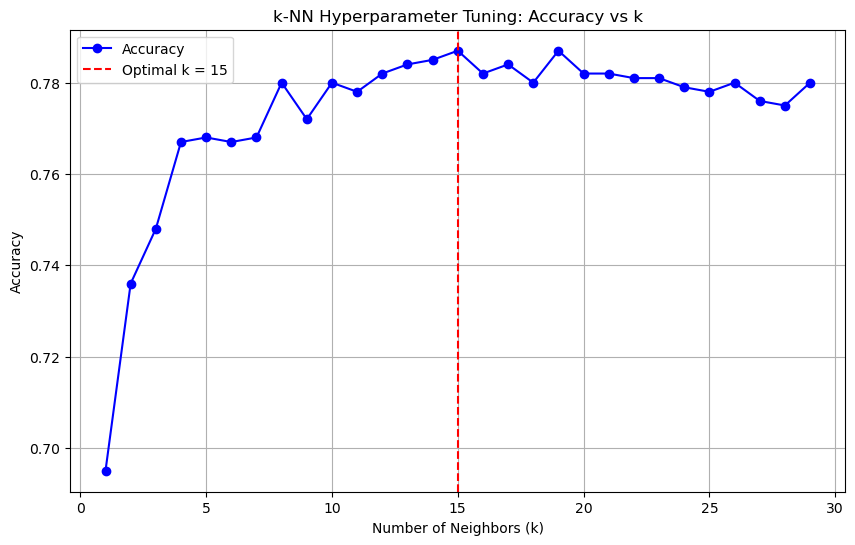

In [36]:
### Code - Plot the accuracies vs. the values for k

# Sources: 
### https://www.w3schools.com/python/matplotlib_markers.asp
### https://www.geeksforgeeks.org/matplotlib-pyplot-axvline-in-python/

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue', label="Accuracy")
plt.axvline(optimal_k, color='red', linestyle='--', label=f"Optimal k = {optimal_k}")
plt.title("k-NN Hyperparameter Tuning: Accuracy vs k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

Source: https://stats.stackexchange.com/questions/597306/accuracy-score-of-my-knn-model-is-constant-as-k-increases <br>
<font color = green> 1. k = 15 gives us the best accuracy of 79%. Comparing the result with k = 3 the accuracy produced by it was only 75%. <br>
2. As value of k gets larger, the accuracy will approach close to the percentage of majority class which is no CVD. This happens because most patients in the dataset are healthy. So the model will mostly predict the majority class, because it looks at so many neighbors that it loses the ability to focus on smaller, more specific patterns.<br>
3. If we choose a small value of k, for example k=1, the model will move towards overfitting and misclassifications which can occur because of noise or outliers. If we choose a large value of k, for example k=30, the model will become too general and it will just average the predictions across other neighbors, which leads to underfitting. Because of this the model will only predict the majority class i.e. "no CVD", eventually losing its ability to identify CVD cases accurately.</font>

_____________________

## <font color = darkorange> 4. Ridge regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healthy/sick) to estimating continuous values. The following exercises are going to involve utilizing one regression model, <font color = darkorange>Ridge Regression</font>, and our goal is to evaluate the performance of this model. 

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as


| Feature | Type | Explanation |
| :- | :- | :-
|sex|binary| Sex, either male (0) or female (1)
|age|numeric| Age in years
|len_head|numeric| Head length in mm
|width_skull|numeric| Skull width in mm
|len_earconch|numeric| Ear conch length in mm
|width_eye|numeric| Distance from medial canthus to lateral canthusof right eye, i.e., eye width in mm
|len_foot|numeric| Foot length in mm
|len_tail|numeric| Tail length in mm
|chest|numeric| Chest grit in mm
|belly |numeric| Belly grit in mm
|len_total|numeric| Total length in mm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [39]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examining those relationships between the variables in the given dataset.


**Exercise 4 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable. 

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

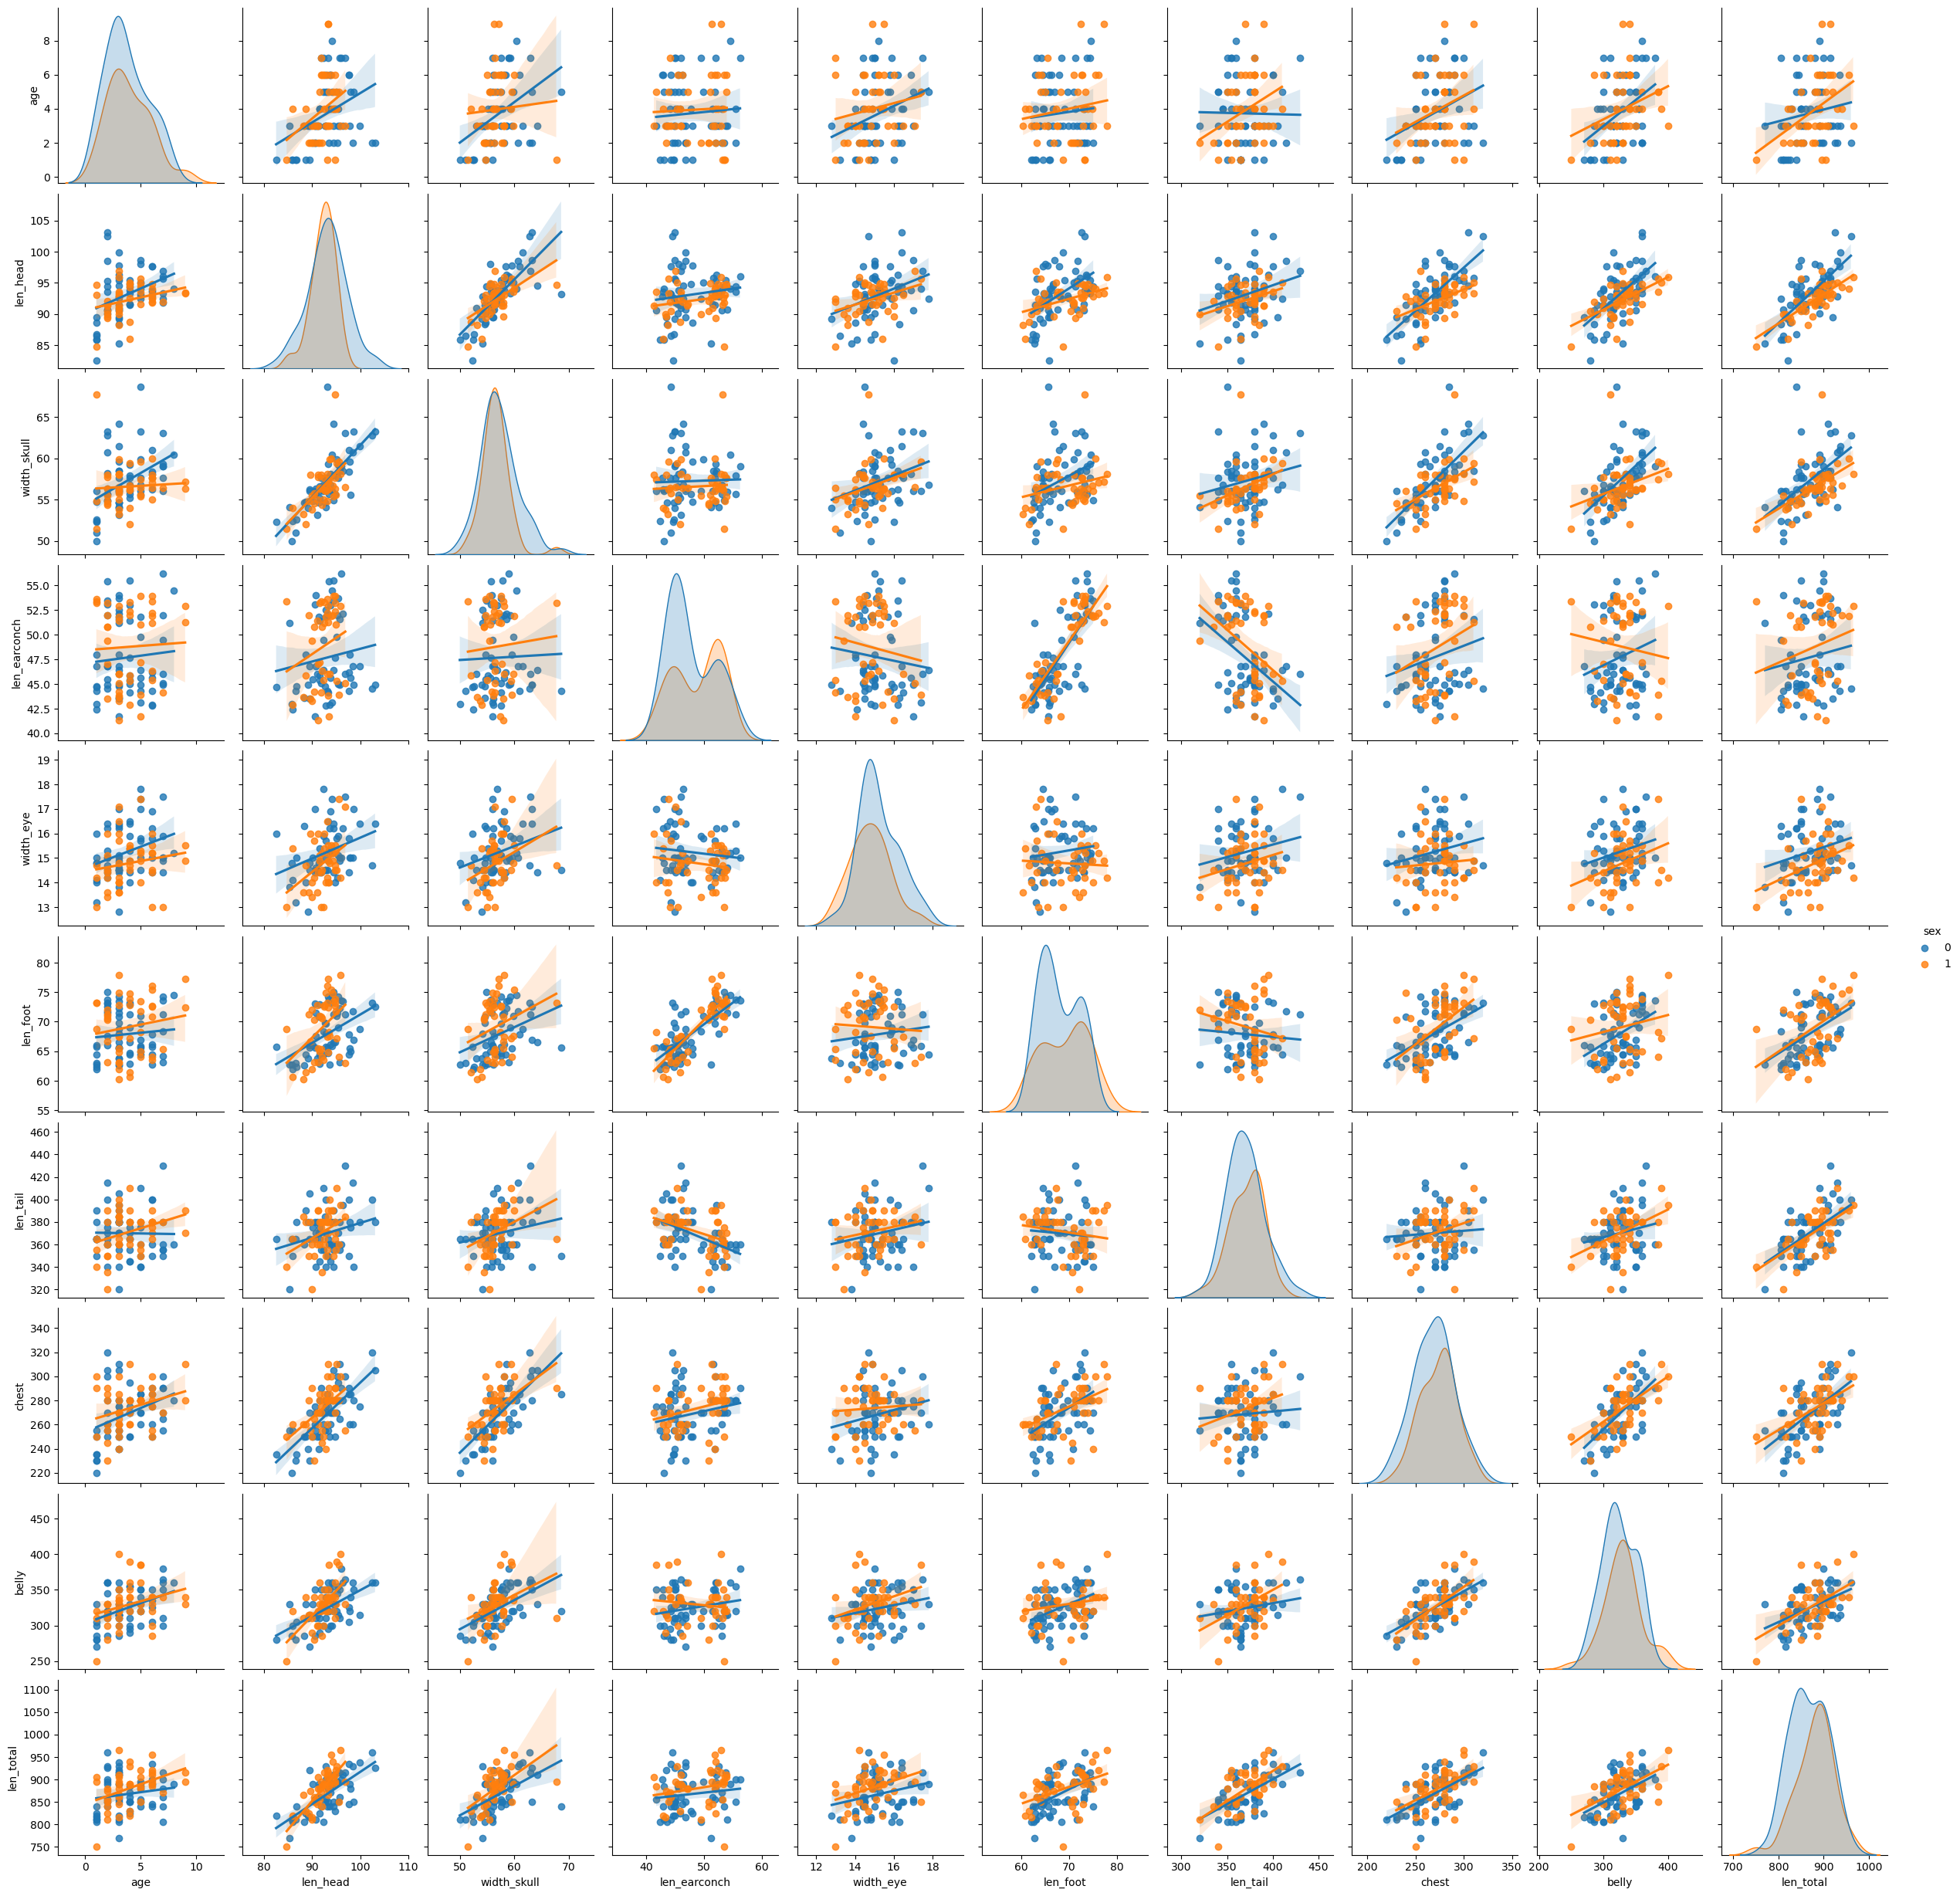

In [50]:
### Code - Pairplot
sns.pairplot(possum_data, 
                 vars=['age', 'len_head', 'width_skull', 'len_earconch', 'width_eye', 'len_foot', 'len_tail', 'chest', 'belly', 'len_total'], 
                 hue='sex',
                 kind='reg')
plt.show()

Are there any differences in the correlations between males and females?

<font color = darkorange>1. Variables like len_head, len_foot, len_tail, and len_total seem to be most correlated with age since as one grows older, the body dimensions generally increase. On the other hand, variables like width_eye, chest, and belly do not represent a strong linear relationship with age, as they vary independently of age maintaining a non-liner relationship. <br>
2. The data points are scattered randomly across all ages, and the regression lines are almost flat. This shows that there is no relationship and visible trend between the age and width_eye. Not just this feature but chest and belly also show a very weak correlation with age The points are spread out without a clear pattern, and the regression lines are nearly horizontal. <br>
3. The regression lines for males (blue) and females (orange) differ len_total: The slope for males is slightly steeper than for females, suggesting a stronger correlation between total length and age for males. For width_skull the correlation is stronger for males compared to females. As far as chest and belly are concerned, males and females show different trends, with females displaying slightly more variability.

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to test the overall performance of the model using the test set.

**Exercise 4 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split. 

*Note: Set the features in the dataframe named as `possum_X` so you can play around with the upcoming code snippet.*

In [74]:
### Code - Data preparation

#Source: https://medium.com/@bernardolago/mastering-ridge-regression-a-key-to-taming-data-complexity-98b67d343087
missing_values = possum_data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

possum_X = possum_data[['len_head', 'width_skull', 'len_earconch', 'width_eye','len_foot', 'len_tail', 'chest', 'belly', 'len_total', 'sex']]
possum_y = possum_data['age']

X_train, X_test, y_train, y_test = train_test_split(possum_X, possum_y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Missing values in each column:
sex             0
age             0
len_head        0
width_skull     0
len_earconch    0
width_eye       0
len_foot        0
len_tail        0
chest           0
belly           0
len_total       0
dtype: int64
Train set size: (80, 10)
Test set size: (21, 10)


<font color = darkorange>We do need to prepare the data before applying ridge regression. This can be done by checking for any missing values and handling them appropriately. Another crucial step is feature scaling to make sure that all numerical features are on the same scale. Standardization also helps improve model performance. Additionally, the sex variable is already binary, so no further encoding is needed. Finally this data preparation will make sure that the model can learn effeciently to make accurate predictions.</font>

------

Regarding Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it).

**Exercise 4 C)**

Fit a ridge regression model with the whole training set. For the hyperparameter 'lambda', use 64. Evaluate the model using the test set and describe the results. For evaluating on the test set, use a metric called mean absolute error (MAE).

- How well did the model perform in estimating the possums' ages?
- How do you interpret the MAE in our case when the target variable is age?

In [80]:
## Code - Ridge regression

#Sources:
#### https://www.geeksforgeeks.org/how-to-calculate-mean-absolute-error-in-python/
#### https://cemurganci.medium.com/linear-regression-and-regularization-ridge-and-lasso-regression-bffe3aa7f51d

ridge_model = Ridge(alpha=64)

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mean_abs_val = mean_absolute_error(y_test, y_pred)
print(f"MAE val on the test set: {mean_abs_val:.2f}")

MAE val on the test set: 1.52


<font color = darkorange>1. Since the MAE = 1.52, it means that the model was able to estimate the ages within a 1.5 year range from the actual age. <br> 
2. In our case the model's predicted age is off by about 1.52 years from the actual age. This further states that the model is fairly close to the correct age but there's still a small error. TO understand this in a better way consider an example where if the real age of a possum is 5 years, the model might predict it to be 3.5 years or 6.5 years. Depending on the situation, an error of 1.5 years might be okay.</font>

Now that we have fitted the regression model, let's break it down for better understanding what is actually happening here. Remember that the model here is essentially just a linear regression model with an added regularization term to deal with e.g overfitting and multicollinearity. We can write the equation used by the model to predict an opossum's age as:

$$
\text{Predicted age} = w_1 \times \text{Sex} + w_2 \times \text{Head length} + w_3 \times \text{Skull width} + ... + w_{10} \times \text{Total length} + \text{Bias}
$$

As mentioned earlier, regression focuses on the relationships between the features and the target variable. In the equation above, each feature contibutes a certain amount to the predicted age, based on the weight $w_i$ learned for that feature. For example, if the total length of an opossum has a large positive weight, it suggests that opossums with greater length are predicted to be older. On the other hand, if the skull width of an opossum has a negative weight, it indicates that opossums with wider skulls are predicted to be younger. In this case, as skull width increases, the predicted age decreases.

Different classes have different class attributes that you can access after e.g. fitting a model, and the `Ridge` class is no exception: For example, the `coef_` variable contains the learned weights $w_1, ..., w_{10}$ that represent the relationship between the features and the target (a.k.a age) variable. The `intercept_` variable holds the bias term (or the intercept, however we wanna call it). 

We can now write down the equation used by our fitted model. You can experiment with it by adjusting the regularization term or using a different sample, if you'd like, to see how the weights and bias change. This is just extra!

In [396]:
# NOTE: To make this code chunk to work with the already fitted model, 
#       the model variable needs to be named as `ridge_model`. Also, the
#       initial feature dataframe is named here as `possum_X`.

________________
## <font color = slategrey> BONUS: Feature selection - most useful features in predicting cardiovascular diseases </font>

You can stop here and get the "pass" grade! To get the pass with honors, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and especially ***why*** you did it. Please note that submitting only code will not be awarded a pass with honors.

----------------


Due to the lack of resources and time, doctors can't measure all the values represented in the given cardio dataset. Fortunately, eager students are willing to help: Your task is to identify <font color = slategrey>five [5] most useful features</font> for predicting the presence of the CVD from the dataset. The steps needed for this job are presented above except the feature selection part. You must remember not to leak any information from the test set when selecting the features, i.e., you try to find those five features using only the training set.

Regarding the feature selection itself, you're asked to use <font color = slategrey>Random Forest</font>. To do this, use the Random Forest classifier's built-in feature importance estimation in scikit-learn. Explain briefly the working of the model on the given cardio dataset: How does the model select features that are relevant in predicting CVD?

Evaluate the model of your choice using accuracy and the area under the ROC curve (AUC). Draw the corresponding curve in a plot.  **Discuss** your findings and results.

What goes wrong in your AUC analysis, if you use the predictions from the `predict()` function instead of the `predict_proba()` function to calculate the AUC?

In [84]:
## Code - Bonus task

X = cardio_data.drop('cardio', axis=1)
y = cardio_data['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Getting the feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 5 Important Features:")
print(importance_df.head(5))

Top 5 Important Features:
  Feature  Importance
3  weight    0.210240
2  height    0.190566
4   ap_hi    0.187322
0     age    0.181316
5   ap_lo    0.100117


Accuracy val: 0.77
Area under curve val: 0.78


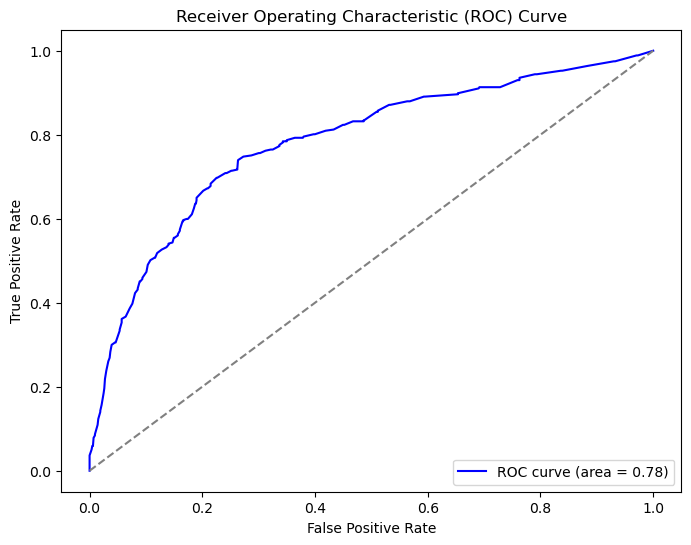

In [91]:
# Predict using the test set

y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy val: {accuracy:.2f}")

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(f"Area under curve val: {roc_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<font color = slategrey>Random Forest model works by selecting features which help the most in predicting whether someone has CVD or not. The method for that is, the model looks at how well each feature helps split the data and reduce uncertainty when making predictions. The example of it can be features like age or cholesterol levels. After training the model, we checked its performance using accuracy and AUC. For the accuracy of 0.77 and an AUC of 0.78 shows it can fairly well tell the difference between people with and without CVD. The reason for using predict_proba() to calculate AUC, is that the predict() function only gives the final prediction (yes or no), while AUC needs the probability scores to understand how confident the model is in its predictions.</font>